<a href="https://colab.research.google.com/github/Lyanan85/In-GameSeries/blob/venv/projeot1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de casos de saúde em estados americanos entre 2015 e 2016
## analise com insights
 material de estudo

## Importando bibliotecas importantes e a tabela original

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df1=pd.read_csv("500_Cities__Local_Data_for_Better_Health__2018_release.csv")
df1.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,Geolocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2015,IN,Indiana,Fishers,City,BRFSS,Health Outcomes,1823278,High blood pressure among adults aged >=18 Years,%,...,24.7,NaN,NaN,76794,POINT (-85.969310702 39.9587635263),HLTHOUT,BPHIGH,1823278.0,NaN,High Blood Pressure
1,2015,CA,California,Milpitas,City,BRFSS,Health Outcomes,0647766,High blood pressure among adults aged >=18 Years,%,...,22.5,NaN,NaN,66790,POINT (-121.892083025 37.433869763),HLTHOUT,BPHIGH,647766.0,NaN,High Blood Pressure
2,2015,CT,Connecticut,Stamford,City,BRFSS,Health Outcomes,0973000,High blood pressure among adults aged >=18 Years,%,...,26.2,NaN,NaN,122643,POINT (-73.5589363142 41.1049145013),HLTHOUT,BPHIGH,973000.0,NaN,High Blood Pressure
3,2015,CA,California,Elk Grove,City,BRFSS,Health Outcomes,0622020,High blood pressure among adults aged >=18 Years,%,...,27.8,NaN,NaN,153015,POINT (-121.384137762 38.4159992006),HLTHOUT,BPHIGH,622020.0,NaN,High Blood Pressure
4,2015,FL,Florida,Palm Bay,City,BRFSS,Prevention,1254000,Cholesterol screening among adults aged >=18 Y...,%,...,78.4,NaN,NaN,103190,POINT (-80.6666722846 27.9838255249),PREVENT,CHOLSCREEN,1254000.0,NaN,Cholesterol Screening


## Renomeando colunas da tabela


In [ ]:
# Dicionário de tradução de colunas
colunas_traduzidas = {
    "Year": "Ano",
    "StateAbbr": "SiglaEstado",
    "StateDesc": "DescricaoEstado",
    "CityName": "NomeCidade",
    "GeographicLevel": "NivelGeografico",
    "DataSource": "FonteDados",
    "Category": "Categoria",
    "UniqueID": "IDUnico",
    "Measure": "Medida",
    "Data_Value_Unit": "UnidadeValorDados",
    "High_Confidence_Limit": "LimiteSuperiorConfianca",
    "Data_Value_Footnote_Symbol": "SimboloNotaRodapeDados",
    "Data_Value_Footnote": "NotaRodapeDados",
    "PopulationCount": "ContagemPopulacional",
    "Geolocation": "Geolocalizacao",
    "CategoryID": "IDCategoria",
    "MeasureId": "IDMedida",
    "CityFIPS": "FIPSCidade",
    "TractFIPS": "FIPSTrato",
    "Short_Question_Text": "TextoCurtoPergunta"
}

# Aplicar a tradução das colunas
df = df1.rename(columns=colunas_traduzidas)

# Exibir o DataFrame com os nomes das colunas traduzidos
df.head()


,Ano,SiglaEstado,DescricaoEstado,NomeCidade,NivelGeografico,FonteDados,Categoria,IDUnico,Medida,UnidadeValorDados,...,LimiteSuperiorConfianca,SimboloNotaRodapeDados,NotaRodapeDados,ContagemPopulacional,Geolocalizacao,IDCategoria,IDMedida,FIPSCidade,FIPSTrato,TextoCurtoPergunta
0,2015,IN,Indiana,Fishers,City,BRFSS,Health Outcomes,1823278,High blood pressure among adults aged >=18 Years,%,...,24.7,NaN,NaN,76794,POINT (-85.969310702 39.9587635263),HLTHOUT,BPHIGH,1823278.0,NaN,High Blood Pressure
1,2015,CA,California,Milpitas,City,BRFSS,Health Outcomes,0647766,High blood pressure among adults aged >=18 Years,%,...,22.5,NaN,NaN,66790,POINT (-121.892083025 37.433869763),HLTHOUT,BPHIGH,647766.0,NaN,High Blood Pressure
2,2015,CT,Connecticut,Stamford,City,BRFSS,Health Outcomes,0973000,High blood pressure among adults aged >=18 Years,%,...,26.2,NaN,NaN,122643,POINT (-73.5589363142 41.1049145013),HLTHOUT,BPHIGH,973000.0,NaN,High Blood Pressure
3,2015,CA,California,Elk Grove,City,BRFSS,Health Outcomes,0622020,High blood pressure among adults aged >=18 Years,%,...,27.8,NaN,NaN,153015,POINT (-121.384137762 38.4159992006),HLTHOUT,BPHIGH,622020.0,NaN,High Blood Pressure
4,2015,FL,Florida,Palm Bay,City,BRFSS,Prevention,1254000,Cholesterol screening among adults aged >=18 Y...,%,...,78.4,NaN,NaN,103190,POINT (-80.6666722846 27.9838255249),PREVENT,CHOLSCREEN,1254000.0,NaN,Cholesterol Screening


## Verificando quais anos a pesquisa se refere:

In [ ]:
#valores da coluna ano

df["Ano"].value_counts()

Ano
2016    694079
2015    116024
Name: count, dtype: int64

## Conferindo de forma decrescente os valores unicos referente a esta pesquisa
coluna DescricaoEstado

In [ ]:
#contagem de estados
dfestados=df["DescricaoEstado"].value_counts()
dfestados

DescricaoEstado
California       156778
Texas             89422
New York          70133
Florida           39025
Illinois          37458
Arizona           29678
Ohio              24111
North Carolin     23305
Michigan          21672
Colorado          20549
Pennsylvania      18392
Washington        15448
Tennessee         15299
Indiana           15281
Virginia          14630
Massachusetts     14346
Oklahoma          13532
Georgia           13251
Missouri          13028
Wisconsin         11849
Louisiana         10875
Nevada            10639
Alabama           10593
Oregon            10402
Minnesota          9123
New Jersey         9013
Kansas             8913
Kentucky           7527
Utah               7431
Hawaii             6721
Connecticut        6603
New Mexico         6273
Nebraska           6216
Iowa               5889
Maryland           5655
South Carolin      5131
District of C      5065
Arkansas           3679
Rhode Island       2993
Mississippi        2229
Idaho              2070


## Agrupando os 20 estados mais relevantes nesta pesquisa

In [ ]:


df_estados=dfestados.head(20)
df_estados


DescricaoEstado
California       156778
Texas             89422
New York          70133
Florida           39025
Illinois          37458
Arizona           29678
Ohio              24111
North Carolin     23305
Michigan          21672
Colorado          20549
Pennsylvania      18392
Washington        15448
Tennessee         15299
Indiana           15281
Virginia          14630
Massachusetts     14346
Oklahoma          13532
Georgia           13251
Missouri          13028
Wisconsin         11849
Name: count, dtype: int64

## Gráfico referente aos estados com mais destaque nesta pesquisa
#### usando a variavel agrupada anteriormente juntamente a biblioteca matplotlib

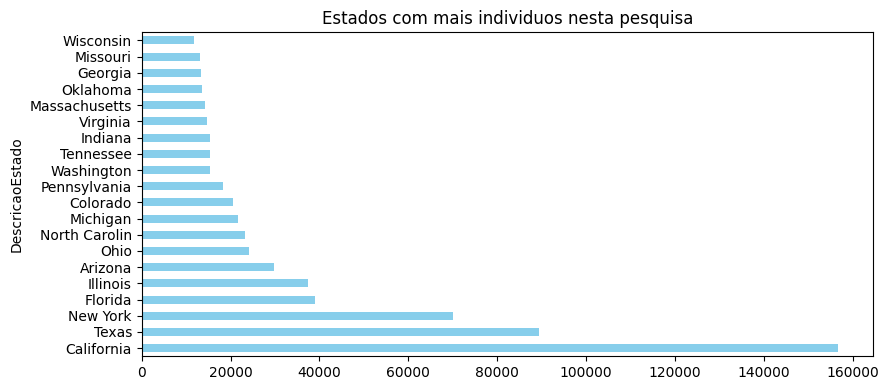

In [ ]:


df_estados.plot(kind="barh", color="Skyblue", figsize=(9,4))
plt.title("Estados com mais individuos nesta pesquisa")
plt.tight_layout()
plt.show()

# Conceito da criação de doi gráficos em uma célula de código
grafico incompleto, essa parte do codigo é apenas para o conceito

### Criando mais duas tabelas, casos gerais de 2015 e 2016
#### Filtrando os casos gerais de 2015 e 2016 e mantendo as colunas "Ano", "Medida" e "DescricaoEstado"

In [ ]:

casosgerais = df.loc[df["Ano"].isin([2015, 2016]), ["Ano", "DescricaoEstado", "Medida"]]
casosgerais2015=casosgerais.loc[casosgerais["Ano"]==2015]
casosgerais2016=casosgerais.loc[casosgerais["Ano"]==2016]


### Verificando as tabelas filtradas

In [ ]:
display(casosgerais2015)

,Ano,DescricaoEstado,Medida
0,2015,Indiana,High blood pressure among adults aged >=18 Years
1,2015,California,High blood pressure among adults aged >=18 Years
2,2015,Connecticut,High blood pressure among adults aged >=18 Years
3,2015,California,High blood pressure among adults aged >=18 Years
4,2015,Florida,Cholesterol screening among adults aged >=18 Y...
...,...,...,...
809684,2015,District of C,High blood pressure among adults aged >=18 Years
809712,2015,North Carolin,Taking medicine for high blood pressure contro...
809895,2015,North Carolin,Cholesterol screening among adults aged >=18 Y...
810021,2015,North Carolin,High blood pressure among adults aged >=18 Years


In [ ]:
display(casosgerais2016)

,Ano,DescricaoEstado,Medida
6,2016,Illinois,Arthritis among adults aged >=18 Years
8,2016,Alabama,Arthritis among adults aged >=18 Years
9,2016,Florida,Stroke among adults aged >=18 Years
10,2016,Indiana,Obesity among adults aged >=18 Years
13,2016,Texas,Mammography use among women aged 50–74 Years
...,...,...,...
810098,2016,California,Binge drinking among adults aged >=18 Years
810099,2016,California,Current smoking among adults aged >=18 Years
810100,2016,Hawaii,Coronary heart disease among adults aged >=18 ...
810101,2016,California,Mental health not good for >=14 days among adu...


In [ ]:
display(casosgerais)

,Ano,DescricaoEstado,Medida
0,2015,Indiana,High blood pressure among adults aged >=18 Years
1,2015,California,High blood pressure among adults aged >=18 Years
2,2015,Connecticut,High blood pressure among adults aged >=18 Years
3,2015,California,High blood pressure among adults aged >=18 Years
4,2015,Florida,Cholesterol screening among adults aged >=18 Y...
...,...,...,...
810098,2016,California,Binge drinking among adults aged >=18 Years
810099,2016,California,Current smoking among adults aged >=18 Years
810100,2016,Hawaii,Coronary heart disease among adults aged >=18 ...
810101,2016,California,Mental health not good for >=14 days among adu...


## Criando novas váriaveis


In [ ]:
CASOSGERAIS2015=casosgerais2015
CASOSGERAIS2016=casosgerais2016
CASOSGERAIS=casosgerais




## CONCEITO de grafico lado a lado
Alternando para 2,1 deixa o grafico em cima e embaixo

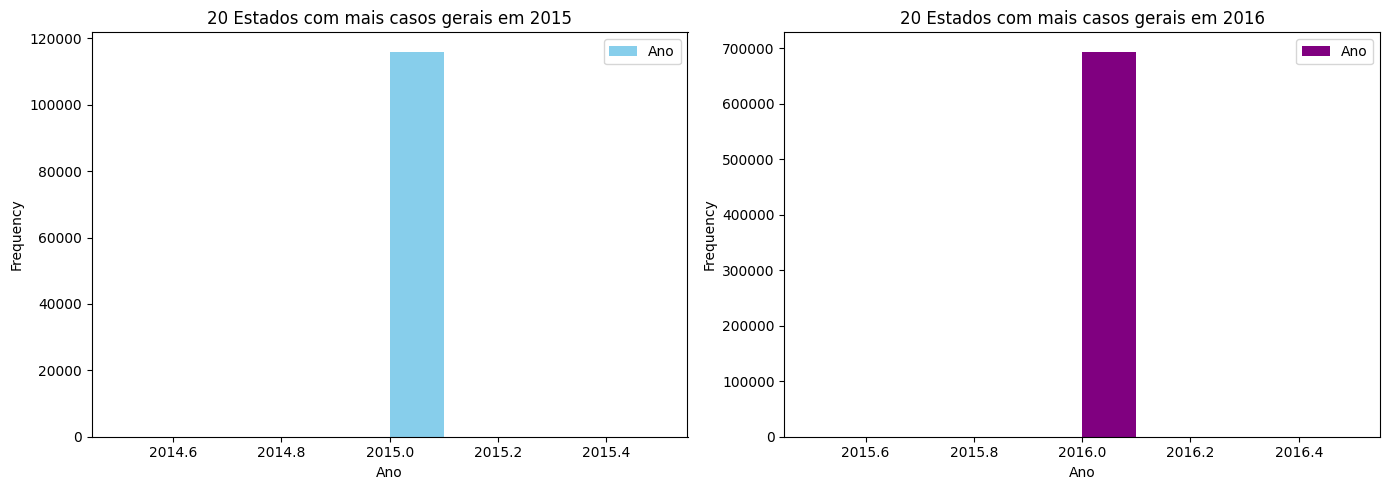

In [ ]:
#fazendo um grafico lado a lado
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(14,5))
CASOSGERAIS2015.plot(kind="hist", color="Skyblue",ax=ax1)
ax1.set_title("20 Estados com mais casos gerais em 2015")
ax1.set_xlabel("Ano")


CASOSGERAIS2016.plot(kind="hist", color="purple",ax=ax2)
ax2.set_title("20 Estados com mais casos gerais em 2016")
ax2.set_xlabel("Ano")


plt.tight_layout()
plt.show()

## Verificando a quantidade de casos por ano nos Estados Americanos

In [ ]:
#contagem de valores na variavel estadoscasos

ESTADOSCASOS=df["Ano"].value_counts()
ESTADOSCASOS

Ano
2016    694079
2015    116024
Name: count, dtype: int64

## comparando casos de 2015 e 2016 através de um gráfico

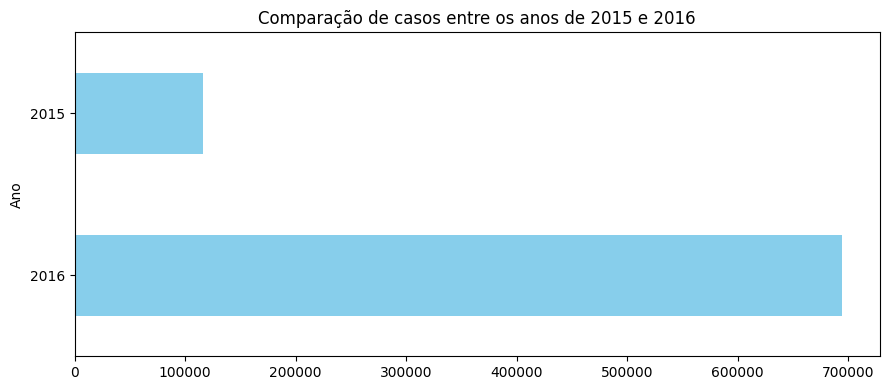

In [ ]:

#COMPARANDO OS CASOS DE 2015 E 2016
ESTADOSCASOS.plot(kind="barh", color="Skyblue", figsize=(9,4))
plt.title("Comparação de casos entre os anos de 2015 e 2016")
plt.tight_layout()
plt.xticks(rotation=360)
plt.show()



## comparar as tendências temporais da taxa de pressão alta e triagem de colesterol ao longo dos anos.
#### ("High blood pressure among adults aged >=18 Years ","Cholesterol screening among adults aged >=18 Years ) na pesquisa

# Verificando quais são os motivos dos  casos e selecionando os 2 primeiros para uma analise brevia


In [ ]:
contagem=df["Medida"].value_counts()
contagem.head(50)

Medida
High blood pressure among adults aged >=18 Years                                                                                                                                                  29006
Cholesterol screening among adults aged >=18 Years                                                                                                                                                29006
Arthritis among adults aged >=18 Years                                                                                                                                                            29006
Stroke among adults aged >=18 Years                                                                                                                                                               29006
Obesity among adults aged >=18 Years                                                                                                                                                             

Essa parte do codigo é responsavel por filtrar na coluna medida os motivos selecionados

In [ ]:


dffiltro=df[df["Medida"].isin(["High blood pressure among adults aged >=18 Years ","Cholesterol screening among adults aged >=18 Years "])]

## Criando uma nova planilha e criando uma nova colunas contendo os valores para a pesquisa

Porém como da para ver, os dados estão vazios

In [ ]:

df_grouped = dffiltro.groupby(['Ano', 'Medida'])['Data_Value'].mean().reset_index()
df_grouped

,Ano,Medida,Data_Value


## Analisando os motivos
como essa linha de codigo conseguimos ver que existem espaços vazios, e por isso está dando como vazio

In [ ]:
#escrever o nome dos valores unicos de df
#se reapara que tem valores em branco
print(df["Medida"].unique())

['High blood pressure among adults aged >=18 Years'
 'Cholesterol screening among adults aged >=18 Years'
 'Arthritis among adults aged >=18 Years'
 'Stroke among adults aged >=18 Years'
 'Obesity among adults aged >=18 Years'
 'Mammography use among women aged 50–74 Years'
 'All teeth lost among adults aged >=65 Years'
 'Diagnosed diabetes among adults aged >=18 Years'
 'Binge drinking among adults aged >=18 Years'
 'Cancer (excluding skin cancer) among adults aged >=18 Years'
 'Mental health not good for >=14 days among adults aged >=18 Years'
 'Chronic obstructive pulmonary disease among adults aged >=18 Years'
 'Current smoking among adults aged >=18 Years'
 'Coronary heart disease among adults aged >=18 Years'
 'Papanicolaou smear use among adult women aged 21–65 Years'
 'Current asthma among adults aged >=18 Years'
 'Sleeping less than 7 hours among adults aged >=18 Years'
 'Visits to dentist or dental clinic among adults aged >=18 Years'
 'Chronic kidney disease among adults age

# Tipo simples de tratamento de dados
## O Metodo str.strip remove os espaços vazios de uma string
O Metodo isin da um true para cada item no filtro, assim realizando a filtragem

In [ ]:
#o metodo strip reemove espaços em branco
#e o isin da um true para cada linha que conter o especificado
#tipo simples de tratamento de dados
dffiltro = df[df["Medida"].str.strip().isin([
    "High blood pressure among adults aged >=18 Years",
    "Cholesterol screening among adults aged >=18 Years"
])]


## Verificando os dados filtrados para 2015

In [ ]:

dffiltro[dffiltro["Ano"] == 2015]["Medida"].value_counts()


Medida
High blood pressure among adults aged >=18 Years      29006
Cholesterol screening among adults aged >=18 Years    29006
Name: count, dtype: int64

## Verificando os dados filtrados para 2016
como da para ver, não temos casos em 2016

In [ ]:

dffiltro[dffiltro["Ano"] == 2016]["Medida"].value_counts()


Series([], Name: count, dtype: int64)

In [ ]:
print(dffiltro["Ano"].value_counts())

Ano
2015    58012
Name: count, dtype: int64


In [ ]:
print(df[(df["Ano"] == 2016) & (df["Medida"].isin([
    "High blood pressure among adults aged >=18 Years",
    "Cholesterol screening among adults aged >=18 Years"
]))])

Empty DataFrame
Columns: [Ano, SiglaEstado, DescricaoEstado, NomeCidade, NivelGeografico, FonteDados, Categoria, IDUnico, Medida, UnidadeValorDados, DataValueTypeID, Data_Value_Type, Data_Value, Low_Confidence_Limit, LimiteSuperiorConfianca, SimboloNotaRodapeDados, NotaRodapeDados, ContagemPopulacional, Geolocalizacao, IDCategoria, IDMedida, FIPSCidade, FIPSTrato, TextoCurtoPergunta]
Index: []

[0 rows x 24 columns]


verificando os 50 primeiros para vermos se encontramos um caso de 2015 (basta alternar o numero 50 para um maior para vizualizar mais dados)

In [ ]:
dffiltro_2016 = df.loc[(df["Ano"] == 2016) & (df["Medida"].isin([
    "High blood pressure among adults aged >=18 Years",
    "Cholesterol screening among adults aged >=18 Years"
]))]
display(dffiltro.head(0))

,Ano,SiglaEstado,DescricaoEstado,NomeCidade,NivelGeografico,FonteDados,Categoria,IDUnico,Medida,UnidadeValorDados,...,LimiteSuperiorConfianca,SimboloNotaRodapeDados,NotaRodapeDados,ContagemPopulacional,Geolocalizacao,IDCategoria,IDMedida,FIPSCidade,FIPSTrato,TextoCurtoPergunta


## Recriando a tabela anterior após ao tratamento de dados e agora com valores

In [ ]:
#recriando a tabela anterior após ao tratamento de dados
DF_grouped=dffiltro.groupby(["Ano", "Medida"])["Data_Value"].mean().reset_index()
DF_grouped

,Ano,Medida,Data_Value
0,2015,Cholesterol screening among adults aged >=18 Y...,72.657522
1,2015,High blood pressure among adults aged >=18 Years,30.491621


Agora com essa tabela é possivel criar uma grafico, em cima, usando o seaborn e omatplot

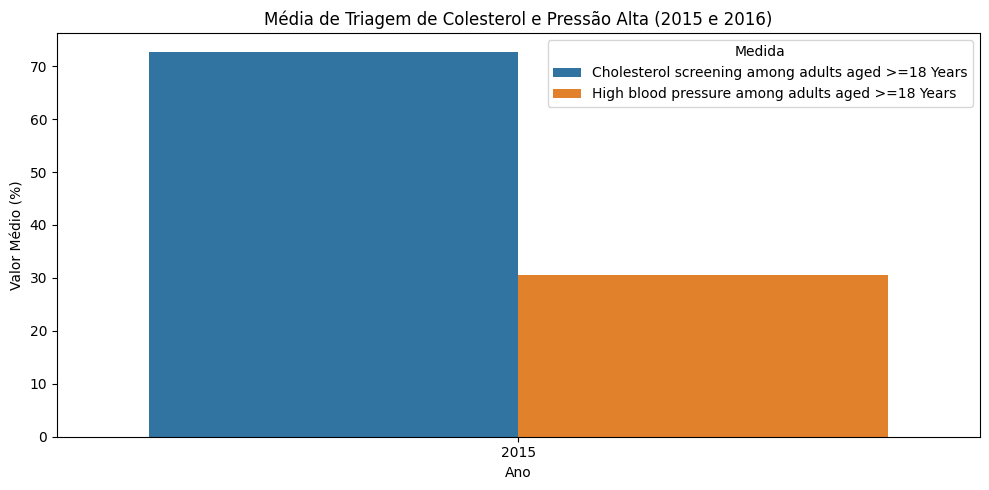

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#estabelecendo tamanho da figura
plt.figure(figsize=(10, 5))
#grafico de barras seaborn (data é de onde vem os dados) x e y estabelecem os eixos
#hue='Medida': Cria barras separadas para cada categoria da variável 'Medida', permitindo comparar as médias entre diferentes medidas.
sns.barplot(data=DF_grouped, x='Ano', y='Data_Value', hue='Medida')

#definição rotulos e configurações visuais do grafico
plt.title('Média de Triagem de Colesterol e Pressão Alta (2015 e 2016)')
plt.ylabel('Valor Médio (%)')
plt.xlabel('Ano')
#definindo a legenda
plt.legend(title='Medida')
#ajusatando o grafico
plt.tight_layout()
plt.show()
